<a href="https://colab.research.google.com/github/rizkiar00/Q-Learning/blob/master/Q_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import random
from IPython.display import clear_output
np.set_printoptions(threshold=1000000)
import seaborn as sns; sns.set()

In [4]:
from google.colab import files
uploaded = files.upload()

Saving DataTugas3ML2019.txt to DataTugas3ML2019.txt


In [19]:
my_data = np.genfromtxt('DataTugas3ML2019.txt', delimiter = '\t')
my_data


array([[ -1.,  -2.,  -3.,  -2.,  -3.,  -3.,  -4.,  -1.,  -4.,  -2.,  -1.,
         -2.,  -3.,  -3., 500.],
       [ -1.,  -3.,  -1.,  -2.,  -4.,  -1.,  -4.,  -1.,  -4.,  -2.,  -4.,
         -2.,  -2.,  -2.,  -1.],
       [ -4.,  -2.,  -1.,  -4.,  -2.,  -1.,  -2.,  -4.,  -2.,  -3.,  -2.,
         -1.,  -2.,  -4.,  -4.],
       [ -4.,  -2.,  -4.,  -1.,  -3.,  -2.,  -3.,  -2.,  -4.,  -2.,  -4.,
         -1.,  -2.,  -4.,  -2.],
       [ -4.,  -2.,  -2.,  -3.,  -2.,  -3.,  -1.,  -1.,  -4.,  -2.,  -1.,
         -3.,  -4.,  -2.,  -4.],
       [ -4.,  -3.,  -3.,  -4.,  -2.,  -3.,  -4.,  -2.,  -2.,  -1.,  -1.,
         -2.,  -1.,  -2.,  -1.],
       [ -2.,  -3.,  -2.,  -1.,  -1.,  -3.,  -2.,  -1.,  -4.,  -3.,  -1.,
         -1.,  -2.,  -3.,  -3.],
       [ -3.,  -1.,  -1.,  -4.,  -4.,  -3.,  -1.,  -2.,  -3.,  -1.,  -1.,
         -4.,  -4.,  -3.,  -3.],
       [ -3.,  -1.,  -4.,  -2.,  -3.,  -3.,  -1.,  -4.,  -4.,  -4.,  -2.,
         -2.,  -2.,  -2.,  -1.],
       [ -3.,  -4.,  -4.,  -2.,  -3.,

In [20]:
#@title Default title text
def build_R(rw):
    xlen = len(rw)
    ylen = len(rw[0])

    d = pd.DataFrame(columns = ['up', 'right', 'down', 'left', 'this'])
    idx = 0 
    
    for i in range(ylen):
        for j in range(xlen):
            move = [float('-inf'),float('-inf'),float('-inf'),float('-inf'), rw[i][j]]
            if i>0: #up
                move[0] = rw[i-1][j]
            if i<ylen-1: #down
                move[2] = rw[i+1][j]
            if j>0: #left
                move[3] = rw[i][j-1]
            if j<xlen-1: #right
                move[1] = rw[i][j+1]
            d.loc[idx] = move
            idx+=1
    return d

R = build_R(my_data)
R = np.array(R)
print(R)

[[-inf  -2.  -1. -inf  -1.]
 [-inf  -3.  -3.  -1.  -2.]
 [-inf  -2.  -1.  -2.  -3.]
 [-inf  -3.  -2.  -3.  -2.]
 [-inf  -3.  -4.  -2.  -3.]
 [-inf  -4.  -1.  -3.  -3.]
 [-inf  -1.  -4.  -3.  -4.]
 [-inf  -4.  -1.  -4.  -1.]
 [-inf  -2.  -4.  -1.  -4.]
 [-inf  -1.  -2.  -4.  -2.]
 [-inf  -2.  -4.  -2.  -1.]
 [-inf  -3.  -2.  -1.  -2.]
 [-inf  -3.  -2.  -2.  -3.]
 [-inf 500.  -2.  -3.  -3.]
 [-inf -inf  -1.  -3. 500.]
 [ -1.  -3.  -4. -inf  -1.]
 [ -2.  -1.  -2.  -1.  -3.]
 [ -3.  -2.  -1.  -3.  -1.]
 [ -2.  -4.  -4.  -1.  -2.]
 [ -3.  -1.  -2.  -2.  -4.]
 [ -3.  -4.  -1.  -4.  -1.]
 [ -4.  -1.  -2.  -1.  -4.]
 [ -1.  -4.  -4.  -4.  -1.]
 [ -4.  -2.  -2.  -1.  -4.]
 [ -2.  -4.  -3.  -4.  -2.]
 [ -1.  -2.  -2.  -2.  -4.]
 [ -2.  -2.  -1.  -4.  -2.]
 [ -3.  -2.  -2.  -2.  -2.]
 [ -3.  -1.  -4.  -2.  -2.]
 [500. -inf  -4.  -2.  -1.]
 [ -1.  -2.  -4. -inf  -4.]
 [ -3.  -1.  -2.  -4.  -2.]
 [ -1.  -4.  -4.  -2.  -1.]
 [ -2.  -2.  -1.  -1.  -4.]
 [ -4.  -1.  -3.  -4.  -2.]
 [ -1.  -2.  -2.  -2

In [22]:
def build_trans(rw):
    xlen = len(rw)
    ylen = len(rw[0])
    
    d = {'up':[] ,'right':[], 'down':[], 'left':[]}
    d = pd.DataFrame(columns = ['up', 'right', 'down', 'left', 'none'])
    idx = 0 
    
    for i in range(ylen):
        for j in range(xlen):
            trans = [-1,-1,-1,-1, idx]
            if i>0: #up
                trans[0] = idx-xlen
            if i<ylen-1: #down
                trans[2] = idx+xlen
            if j>0: #left
                trans[3] = idx-1
            if j<xlen-1: #right
                trans[1] = idx+1
            d.loc[idx] = trans
            idx+=1
    return d
trans = build_trans(my_data)
trans = np.array(trans)
trans

array([[-1, 1, 15, -1, 0],
       [-1, 2, 16, 0, 1],
       [-1, 3, 17, 1, 2],
       [-1, 4, 18, 2, 3],
       [-1, 5, 19, 3, 4],
       [-1, 6, 20, 4, 5],
       [-1, 7, 21, 5, 6],
       [-1, 8, 22, 6, 7],
       [-1, 9, 23, 7, 8],
       [-1, 10, 24, 8, 9],
       [-1, 11, 25, 9, 10],
       [-1, 12, 26, 10, 11],
       [-1, 13, 27, 11, 12],
       [-1, 14, 28, 12, 13],
       [-1, -1, 29, 13, 14],
       [0, 16, 30, -1, 15],
       [1, 17, 31, 15, 16],
       [2, 18, 32, 16, 17],
       [3, 19, 33, 17, 18],
       [4, 20, 34, 18, 19],
       [5, 21, 35, 19, 20],
       [6, 22, 36, 20, 21],
       [7, 23, 37, 21, 22],
       [8, 24, 38, 22, 23],
       [9, 25, 39, 23, 24],
       [10, 26, 40, 24, 25],
       [11, 27, 41, 25, 26],
       [12, 28, 42, 26, 27],
       [13, 29, 43, 27, 28],
       [14, -1, 44, 28, 29],
       [15, 31, 45, -1, 30],
       [16, 32, 46, 30, 31],
       [17, 33, 47, 31, 32],
       [18, 34, 48, 32, 33],
       [19, 35, 49, 33, 34],
       [20, 36, 50, 34, 

In [27]:
def build_va(trans):
    va = []
    for i in range(len(trans)):
        current_va = []
        if (trans[i][0] != -1): #up
            current_va.append(0)
        if (trans[i][1] != -1): #right
            current_va.append(1)
        if (trans[i][2] != -1): #down
            current_va.append(2)
        if (trans[i][3] != -1): #left
            current_va.append(3)
        current_va.append(4)
        va.append(current_va)
    return va
va = build_va(trans)
va = np.array(va)
va

array([list([1, 2, 4]), list([1, 2, 3, 4]), list([1, 2, 3, 4]),
       list([1, 2, 3, 4]), list([1, 2, 3, 4]), list([1, 2, 3, 4]),
       list([1, 2, 3, 4]), list([1, 2, 3, 4]), list([1, 2, 3, 4]),
       list([1, 2, 3, 4]), list([1, 2, 3, 4]), list([1, 2, 3, 4]),
       list([1, 2, 3, 4]), list([1, 2, 3, 4]), list([2, 3, 4]),
       list([0, 1, 2, 4]), list([0, 1, 2, 3, 4]), list([0, 1, 2, 3, 4]),
       list([0, 1, 2, 3, 4]), list([0, 1, 2, 3, 4]),
       list([0, 1, 2, 3, 4]), list([0, 1, 2, 3, 4]),
       list([0, 1, 2, 3, 4]), list([0, 1, 2, 3, 4]),
       list([0, 1, 2, 3, 4]), list([0, 1, 2, 3, 4]),
       list([0, 1, 2, 3, 4]), list([0, 1, 2, 3, 4]),
       list([0, 1, 2, 3, 4]), list([0, 2, 3, 4]), list([0, 1, 2, 4]),
       list([0, 1, 2, 3, 4]), list([0, 1, 2, 3, 4]),
       list([0, 1, 2, 3, 4]), list([0, 1, 2, 3, 4]),
       list([0, 1, 2, 3, 4]), list([0, 1, 2, 3, 4]),
       list([0, 1, 2, 3, 4]), list([0, 1, 2, 3, 4]),
       list([0, 1, 2, 3, 4]), list([0, 1, 2, 3, 4])

In [257]:
Q = np.full((225, 5), -100)
alfa = 0.1 #Learning Rate
gamma = 0.9 #Discount Factor
episodes = 1000
reward_list = []
bestreward = -10000
for i in range(episodes):
    #start = 210
    start_state = random.randint(14,224)
    goal_state = 14
    current_state = start_state
    current_reward = R[current_state][4]
    liststate = []
    listaction = []
    beststate = []
    bestaction = []
    while current_state != goal_state:
        action = random.choice(va[current_state])
        next_state = trans[current_state][action]
        future_rewards = []
        for action_nxt in va[next_state]:
            future_rewards.append(Q[next_state][action_nxt])
        liststate.append(current_state)
        listaction.append(action)
        #update Q
        #print('CS : {}\nAct : {}'.format(current_state, action))
        qstate = Q[current_state][action]+alfa*(R[current_state][action] + gamma*max(future_rewards)-Q[current_state][action])
        Q[current_state][action] = qstate
        #print(Q)
        current_state = next_state
        current_reward += R[current_state][4]
        if(current_state == goal_state) and ((i+1) % 100 == 0):
            print('Episode {}, score : {}'.format(i, current_reward))
            reward_list.append(current_reward)
            if(bestreward<current_reward):
              beststate = liststate
              bestaction = listaction

Episode 99, score : -6411.0
Episode 199, score : -1170.0
Episode 299, score : -3593.0
Episode 399, score : -1926.0
Episode 499, score : -2462.0
Episode 599, score : -1819.0
Episode 699, score : 396.0
Episode 799, score : -3900.0
Episode 899, score : -8063.0
Episode 999, score : 22.0


In [219]:
max(reward_list)

array([-6, -6])

In [258]:
# for i in range(len(Q)):
#   for j in range(5):
#     if(Q[i][j]==0):
#       Q[i][j]=-100
      
start_state = 210
goal_state = 14
current_state = start_state
liststate = []
listaction = []
current_reward = 0
while current_state != goal_state:
  action = np.argmax(Q[current_state][0:2])
  current_state = trans[current_state][action]
  current_reward += R[current_state][4]
  liststate.append(current_state)
  listaction.append(action)
  print('current_state: ', current_state)
print('Reward: ', current_reward)

current_state:  195
current_state:  180
current_state:  165
current_state:  150
current_state:  135
current_state:  120
current_state:  121
current_state:  106
current_state:  107
current_state:  92
current_state:  93
current_state:  94
current_state:  79
current_state:  64
current_state:  65
current_state:  66
current_state:  67
current_state:  68
current_state:  69
current_state:  70
current_state:  71
current_state:  56
current_state:  41
current_state:  26
current_state:  27
current_state:  28
current_state:  29
current_state:  14
Reward:  451.0


J:0 K:14
J:14 K:0


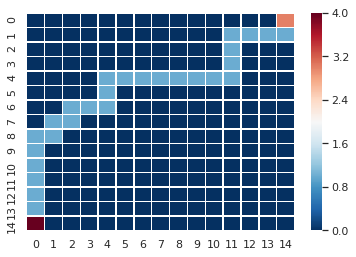

In [267]:
point = np.zeros((15,15))
i = 0
for j in range(15):
  for k in range(15):
    point[j][k] = liststate.count(i)
    if (i == 14):
      point[j][k] += 2
      print('J:{} K:{}'.format(j,k))    
    if (i == 210):
      point[j][k] += 4
      print('J:{} K:{}'.format(j,k))
    i += 1
ax = sns.heatmap(point,linewidths=.5,cmap="RdBu_r")

In [237]:

5 % 2

1